In [1]:
import sys, os
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

# !pip install advent-of-code-data
# https://github.com/wimglenn/advent-of-code-data #for input parsing/loading
from aocd import get_data  # simple, #get_data(day=24, year=2021)
from aocd.models import Puzzle


In [2]:
%matplotlib inline

In [3]:
%load_ext pycodestyle_magic
%pycodestyle_on 
%pycodestyle_off

In [130]:
#  run ONCE
import datetime
today = datetime.datetime.now().day
puzzle = Puzzle(year=2022, day=today)
#print(puzzle.user)
print(puzzle.input_data_fname[60:])
print(puzzle.example_input_data_fname[60:])


iA = puzzle.input_data
iE = puzzle.example_data

try:
    print(puzzle.easter_egg)
except:
    pass

#basic example:
iB = 'noop\naddx 3\naddx -5'
print(iB)
#print(iA)
#print(iE)

2022_10_input.txt
2022_10_example_input.txt
noop
addx 3
addx -5


In [465]:

def parse(i=iA):
    lines = i.split('\n')
    return lines
#print(lines)

def one_cycle(X,cycles_passed):
    return  [X[1],X[2],X[2]],cycles_passed+1
    
def add_to_X(X,val):
    X[2] += val
    return X



def solve_A(i=iE):
    lines = parse(i=i)
    index=0
    last = len(lines)-1
    cycles_passed = 1
    X =[1,1,1] #register and t-1,t-2
    X_=[]
    store_at_list = [20, 60, 100, 140, 180, 220]
    strength_ = []
    cycles_passed_ = []
    
    

    while index <= last:
        line = lines[index]
        index+= 1
        #print(index,line)
        #print('noop' in line)
        
        
        if cycles_passed== 5:
            #print('x after 5: ',X)
            pass
        
        # evaluate state
        if cycles_passed in store_at_list:
            #print(cycles_passed,'cycles passed')
            #print(X)
            strength_.append(int(X[0])*int(cycles_passed))
            cycles_passed_.append(cycles_passed)           
        
        #print('cycle before incr:',cycles_passed,X)

        # command effects.
        if 'noop' in line:
            #print(index,'noop in ', line)
            [X,cycles_passed] = one_cycle(X,cycles_passed) # increment.
            X_.append(int(X[0]))
            pass 
        elif 'addx' in line:
            #print(index, line,':addx found')
            (command, val1)=line.split(' ')
            add_to_X(X,int(val1))
            [X,cycles_passed] = one_cycle(X,cycles_passed) # increment.
            X_.append(int(X[0]))
            [X,cycles_passed] = one_cycle(X,cycles_passed) # increment.
            X_.append(int(X[0]))
            
            if cycles_passed in store_at_list:
                #print(cycles_passed,'cycles passed')
                #print(X)
                strength_.append(int(X[0])*int(cycles_passed))
                cycles_passed_.append(cycles_passed)
                
        
            
            #[X,cycles_passed] = one_cycle(X,cycles_passed) # increment
            #X_.append(int(X[0]))

        #print('cycle after  incr:',cycles_passed,X)
        
    print(cycles_passed,'commands ended after #cycles')

    # X doesnt change anymore!
    while cycles_passed <= 240+1: #max(max(store_at_list)+1,40*6+1):
        
        if cycles_passed== 5:
            #print('x after 5: ',X)
            pass
        if cycles_passed in store_at_list:
            print(cycles_passed,'cycles passed')
            #print(X)
        
        #print('cycle before incr:',cycles_passed,X)
        [X,cycles_passed] = one_cycle(X,cycles_passed) # increment.
        X_.append(int(X[0]))
        
        #print('cycle after  incr:',cycles_passed,X)
    print(cycles_passed,'cycles after all eval #cycles')
    print('strengths')
    print(store_at_list)
    print(strength_)
    print('lenx', len(X_))
    return(sum(strength_),strength_,cycles_passed_,X_)


In [466]:
#print(iE)
answA,strength_,cycles_passed_,X_= solve_A(i=iE)
print(max(store_at_list))
print('answA', answA)
lines = parse(i=iA)
index=0
last = len(lines)-1
print(last)
print(len(X_))
print((X_[0:10]))


241 commands ended after #cycles
242 cycles after all eval #cycles
strengths
[20, 60, 100, 140, 180, 220]
[420, 420, 1260, 1260, 2100, 2100, 2940, 2940]
lenx 241
220
answA 13440
139
241
[1, 1, 1, 1, 6, 6, 6, 7, 7, 7]


241 commands ended after #cycles
242 cycles after all eval #cycles
strengths
[20, 60, 100, 140, 180, 220]
[420, 420, 1260, 1260, 2100, 2100, 2940, 2940]
lenx 241
13440
[20, 20, 60, 60, 100, 100, 140, 140]
[420, 420, 1260, 1260, 2100, 2100, 2940, 2940]
241
..■■..■■■■..■■..■■■..■..■.■■■..■■■■.■■■
■■■■..■■..■■■..■..■.■■■..■■■■.■■■.■....
■■..■■■..■..■.■■■..■■■■.■■■.■.......■■■
■..■..■.■■■..■■■■.■■■.■.......■■■■.■■■■
■.■■■..■■■■.■■■.■.......■■■■.■■■■.■■■■■
.■■■■.■■■.■.......■■■■.■■■■.■■■■■■....■
[1, 1, 1, 1, 6, 6, 6, 7, 7, 7, 11, 11, 36, 36, 16, 16, 16, 16, 21, 21]


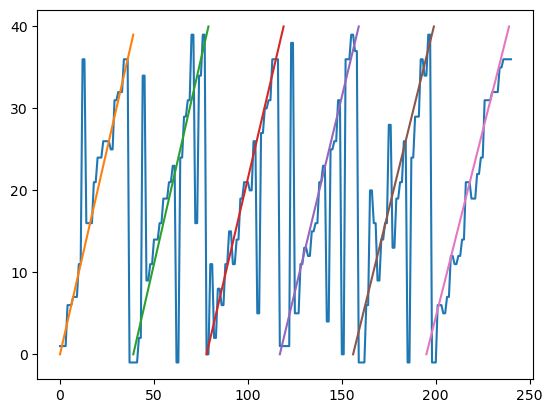

In [498]:
# i = iE
# a_obj = a(i)

# a_obj.fun()
#print(strength_)
answA,strength_,cycles_passed_,X_= solve_A(i=iA)


print(answA)
print(cycles_passed_)
print(strength_)


plt.plot(X_)
plt.plot([0,39],[0,39])
plt.plot([0+39*1,39+40*1],[0,40])
plt.plot([0+39*2,39+40*2],[0,40])
plt.plot([0+39*3,39+40*3],[0,40])
plt.plot([0+39*4,39+40*4],[0,40])
plt.plot([0+39*5,39+40*5],[0,40])


print(len(X_))


grid =[0 for i in np.arange(0,6*40)]
for i in range(40*6-1):
    rownr = np.mod(i,39)
    if X_[i-1] >=  rownr-1 and X_[i-1] <= rownr+1:#in 3 values
    #if X_[i] == i or  X_[i+1] == i or  X_[i+2] == i:
        grid[i+1]= 1
#print(grid)


for i in range(6):
    line_ =''
    for j in grid[6*i:6*i+39]:
        if (j>0):
            line_ += '■' 
        else:
            line_ += '.'
    print(line_)        
    
    
    #print(grid[6*i:6*i+40])
print(X_[0:20])

In [ ]:
puzzle.answer_b = answB # this submits!

In [426]:
#Pauwel's oplossing, toegepast op mijn data:
fname = puzzle.input_data_fname
file1=open(fname, 'r')
Xrij=[1]
X=1

while True:
    a=file1.readline()
    if not a:
        break
    Xrij.append(X)
    if a[0] == 'a':
        Xrij.append(X)
        X += int(a.split(' ')[1])

print(20*Xrij[20]+60*Xrij[60]+100*Xrij[100]+140*Xrij[140]+180*Xrij[180]+220*Xrij[220])

screen=[]
screen=''
for i in range(len(Xrij)):
    if abs(i%40-1-Xrij[i]) < 2:
        screen +='■'
    else:
        screen +='.'
print(screen[0:40])
print(screen[40:80])
print(screen[80:120])
print(screen[120:160])
print(screen[160:200])
print(screen[200:240])

13680
.■■■..■■■■..■■..■■■..■..■.■■■..■■■■.■■■.
■■..■....■.■..■.■..■.■.■..■..■.■....■..■
■■..■...■..■....■..■.■■...■..■.■■■..■■■.
.■■■...■...■.■■.■■■..■.■..■■■..■....■..■
.■....■....■..■.■....■.■..■....■....■..■
■■....■■■■..■■■.■....■..■.■....■■■■.■■■.


In [ ]:
PZGPKPEB